In [2]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [3]:
a = pd.read_csv("example_stats6.csv")

This plot shows average fitness over time

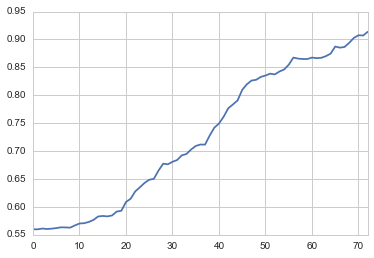

In [4]:
a['mean'].plot()

To show the population of a generation, we have to transpose the dataframe

In [5]:
b = a.T

Now the individual generation can be plotted. Here we can see each individuals fitness value plotted 

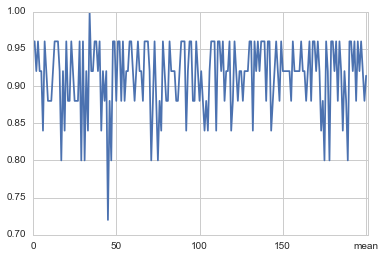

In [7]:
b[72].plot()

Here is the fitness of the population half way through the simulation

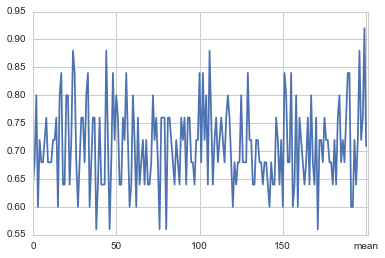

In [8]:
b[35].plot()

We can also plot histograms ... Here is the histogram of the first generation, it shows that most fitness values are at 0.56

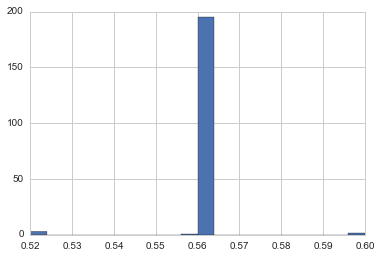

In [23]:
b[1].hist( bins=20)

And so we can see histograms for various stages through the simulation

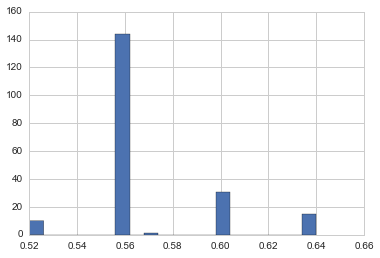

In [24]:
b[10].hist( bins=20)

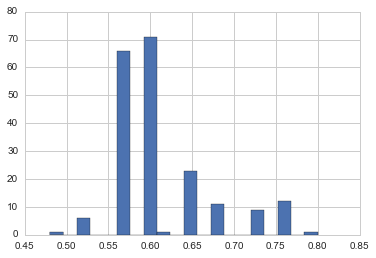

In [38]:
b[20].hist( bins=20)

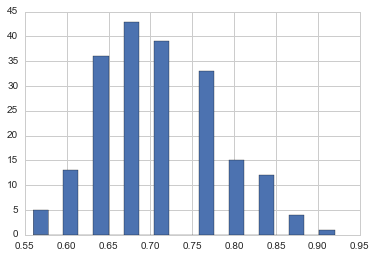

In [39]:
b[35].hist( bins=20)

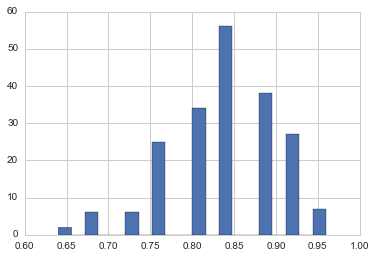

In [27]:
b[50].hist( bins=20)

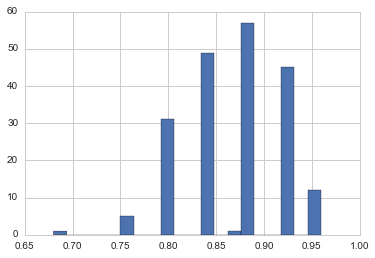

In [28]:
b[60].hist( bins=20)

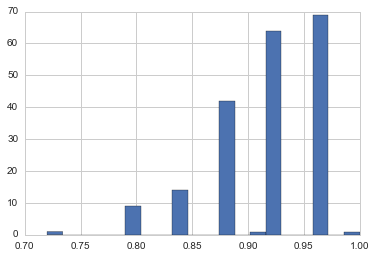

In [29]:
b[72].hist( bins=20)

we can also track the path of an individual element 

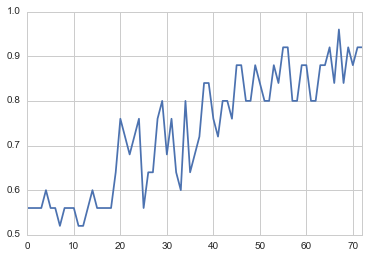

In [30]:
a['145'].plot()

The plot above shows how the fitness of the 145th population member increased. 

The roulette wheel for population member selection can be viewed at any time ... 

In [49]:
output = []
count =0
for i in b[71]:
    count = count + 1
    if count < 200:
        output.append(i)
#output

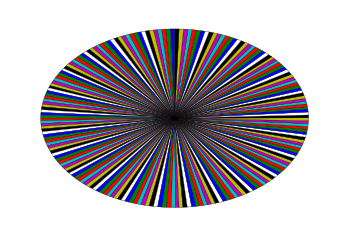

In [50]:
plt.pie(output,
        startangle=90);

Compute the standard deviation in 2 ways ... 1st is the slow way, 2nd the numpy way

In [36]:

sum_output = 0.0
for i in output:
    sum_output += i
mean = sum_output / float(len(output))
sum_x_minus_mean_squared = 0.0
for i in output:
    var_step = (i-mean)
    #print var_step
    sum_x_minus_mean_squared +=  (var_step*var_step) # x-mean squared
    
sigma = np.sqrt(sum_x_minus_mean_squared / float(len(output))) # note, this isn't N-1

#
# Slow or manual way to compute the standard deviation
#
#
print "Slow or Manual Standard Deviation      %f" %sigma

#
#  Use Numpy to compute Standard Deviation
#
#

print "Numpy Standard Deviation               %f" % np.std(output)
    
    


Slow or Manual Standard Deviation      0.035870
Numpy Standard Deviation               0.035870


At any time I can see how many samples are outside 1 or several standard deviations

In [40]:
count_samples = 0
for i in output:
    dist = i-mean
    if dist > sigma or dist < -sigma:
        count_samples+=1

print "Number of samples outside 1 standard deviation %d" %count_samples

Number of samples outside 1 standard deviation 44


Now I would like to see how the standard deviation changed over the course of the simulation

In [45]:
std_dev_table = []
for s in range(0,72):
    std_dev_table.append(np.std(b[s]))

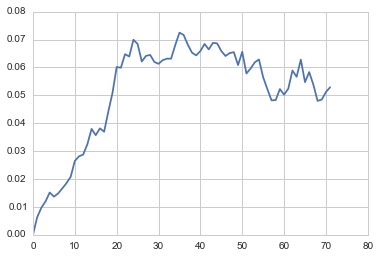

In [46]:
plt.plot(std_dev_table)